# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)


/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


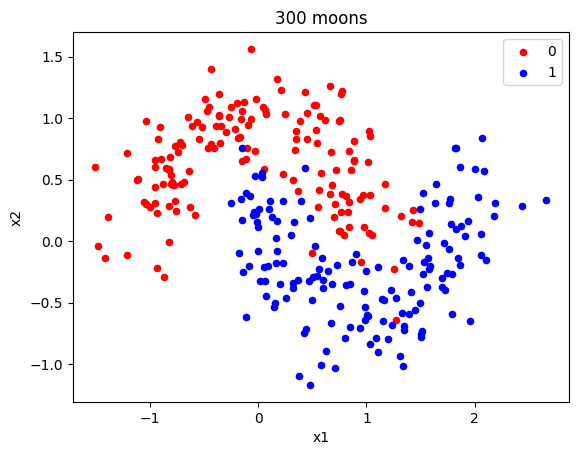

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])


    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)


❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

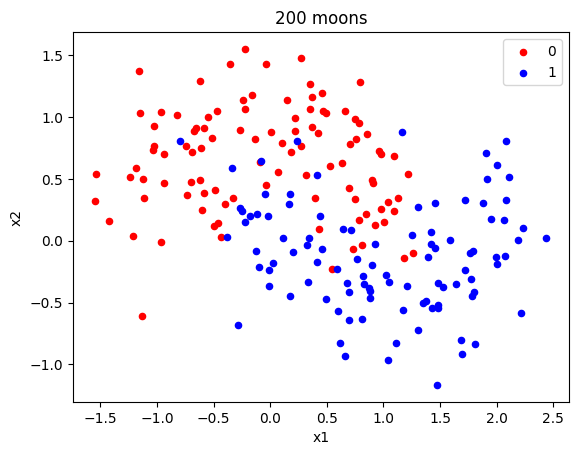

In [3]:
# YOUR CODE HERE
### Generating the moons dataset
X1, y1 = make_moons(n_samples=200, noise=0.30, random_state=0)
plot_moons(X1, y1)


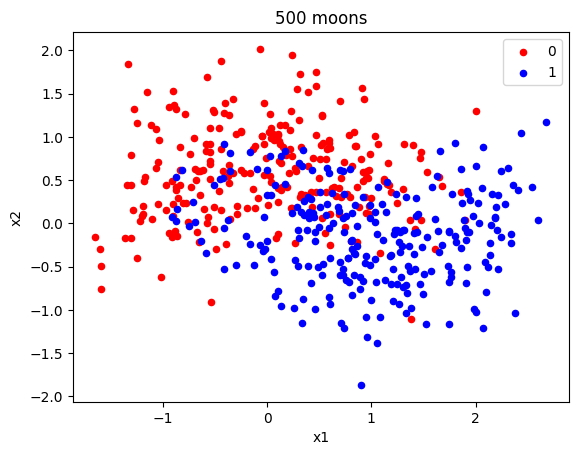

In [4]:
### Generating the moons dataset
X2, y2 = make_moons(n_samples=500, noise=0.45, random_state=0)
plot_moons(X2, y2)


❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
# YOUR CODE HERE
# Create 250 samples with noise = 0.20 and random_state = 0 and
# split them into training and test sets using train_test_split
# with train_size = 0.70

from sklearn.model_selection import train_test_split

X3, y3 = make_moons(n_samples=250, noise=0.20, random_state=0)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.70, random_state=0)

print(f"X3_train shape: {X3_train.shape}")
print(f"y3_train shape: {y3_train.shape}")
print(f"X3_test shape: {X3_test.shape}")
print(f"y3_test shape: {y3_test.shape}")


X3_train shape: (175, 2)
y3_train shape: (175,)
X3_test shape: (75, 2)
y3_test shape: (75,)


## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [6]:
# YOUR CODE HERE
# Create a neural network with a first layer of 5 neurons and
# a RELU activation function and
# an output layer with a single neuron and a sigmoid activation function for
# binary classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.summary()


2023-11-13 12:31:52.645953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
    ])


    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced

    return model

model = initialize_model()


---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [7]:
# YOUR CODE HERE
2*5 + 5 + 5*1 + 1


21

## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [9]:
# YOUR CODE HERE
# Train the model for 100 epochs and a batch size of 32 and
# save the training history in a variable called history

history = model.fit(X3_train, y3_train, epochs=100, batch_size=32)


Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.3600
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.3714
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.3200
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.3886
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5771
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6857
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6914
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.6914
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6971
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6971
Epoch 11/100
6/6 [===========

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [10]:
# YOUR CODE HERE
# Inspect history using history.__dict__

history.__dict__


{'validation_data': None,
 'model': <keras.src.engine.sequential.Sequential at 0x147c6d6c0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7166439294815063,
   0.7098458409309387,
   0.7033454179763794,
   0.6970569491386414,
   0.6910279393196106,
   0.6853641867637634,
   0.6797518134117126,
   0.6745393872261047,
   0.6688542366027832,
   0.6639922857284546,
   0.6585944890975952,
   0.6533215045928955,
   0.6484604477882385,
   0.6436657905578613,
   0.638981819152832,
   0.6342099905014038,
   0.6296043395996094,
   0.62508624792099,
   0.6205235719680786,
   0.6162385940551758,
   0.6120527982711792,
   0.6076130270957947,
   0.6035917401313782,
   0.5995818376541138,
   0.5956623554229736,
   0.5918797254562378,
   0.5880014896392822,
   0.5841552019119263,
   0.5804016590118408,
   0.5768629908561707,
   0.5732424259185791,
   0.5696989893913269,
   0.5663744211196899,
   0.562839686870575,
   0.5598417520523071,
   0.5565317869186401,
   0.5

❓ Plot the history of the train loss using the following function ❓

In [11]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


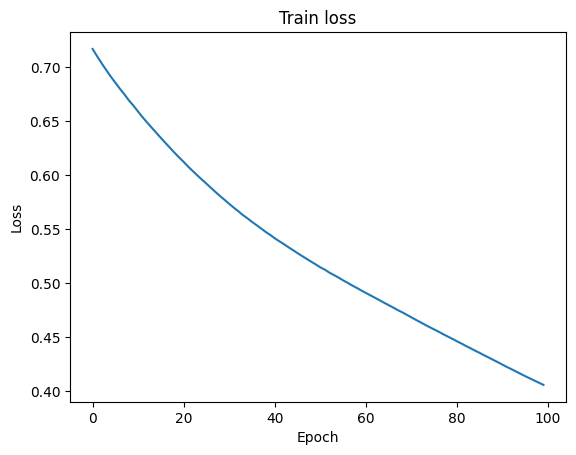

In [12]:
# YOUR CODE HERE
# Plot the training history using plot_history

plot_history(history)


❓ What do you observe ❓

> Training loss decreases over time. This is normal as the model is learning from the data.

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [14]:
# YOUR CODE HERE
# Predict the classes of the test set and save them in a variable called y_pred

y_pred = model.predict(X3_test)


3/3 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [15]:
# YOUR CODE HERE
# Print loss and accuracy on the test set using evaluate

test_loss, test_acc = model.evaluate(X3_test, y3_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {test_acc}")


3/3 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8267
Loss: 0.4065436124801636
Accuracy: 0.8266666531562805


In [17]:
accuracy = test_acc


**🧪 Test your code**

In [18]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1787/1787 [==============================] - 1s 749us/step


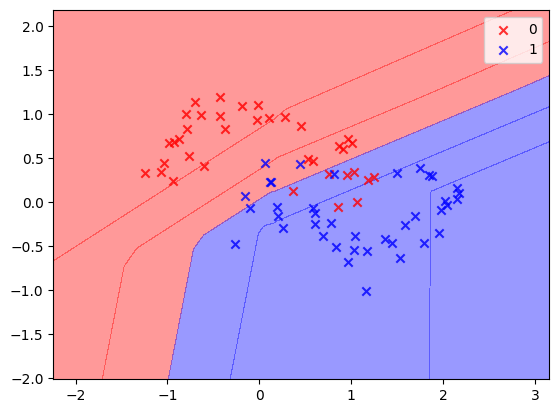

In [19]:
# YOUR CODE HERE
# Check the accuracy of the predictions visually using plot_decision_regions available
# in utils/plots.py

from utils.plots import plot_decision_regions

plot_decision_regions(X3_test, y3_test, model)


😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8400
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8400
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8400
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8400
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8400
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8400
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8400
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8400
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8400
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8400
Epoch 11/500
6/6 [===========

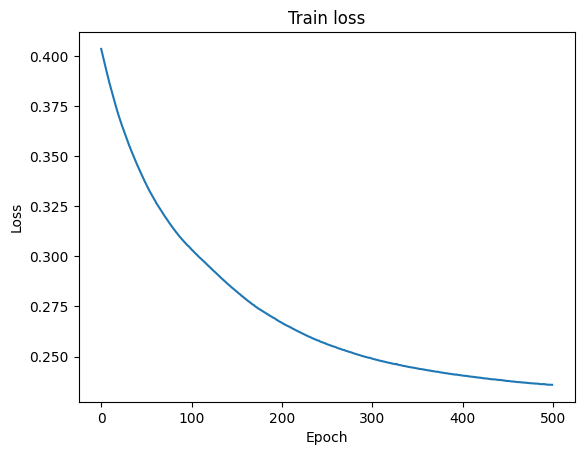

In [20]:
# YOUR CODE HERE
# Re-train the model for 500 epochs and a batch size of 32 and
# plot the training history

history = model.fit(X3_train, y3_train, epochs=500, batch_size=32)

plot_history(history)


❓ Did the test accuracy improve? ❓

In [21]:
# YOUR CODE HERE
# Print the test accuracy

test_loss, test_acc = model.evaluate(X3_test, y3_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {test_acc}")


3/3 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8533
Loss: 0.2703090012073517
Accuracy: 0.8533333539962769


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [22]:
def initialize_model_2():

    #############################
    #  1 - Model architecture   #
    #############################

    # Neural network with 1st layer of 20 neurons and a RELU activation function
    # and 2nd layer of 10 neurons with a RELU activation function
    # and 3rd layer of 5 neurons with a RELU activation function
    # and an output layer with a single neuron and a sigmoid activation function

    model = Sequential([
    Dense(20, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
    ])


    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced

    return model

model = initialize_model_2()


❓ What is the number of parameters of your new model ❓

In [23]:
# YOUR CODE HERE
# Number of parameters for the entire model

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.7573 - accuracy: 0.3086
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.3429
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.7177 - accuracy: 0.4971
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5543
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6514
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7143
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7314
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7657
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7771
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7943
Epoch 11/500
6/6 [===========

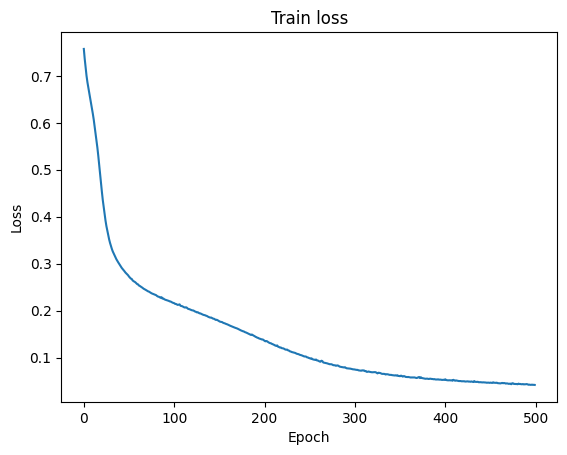

In [24]:
# YOUR CODE HERE
# Train the model for 500 epochs and a batch size of 32 and
# plot the training history

history = model.fit(X3_train, y3_train, epochs=500, batch_size=32)

plot_history(history)


❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [25]:
# YOUR CODE HERE
# Print the test accuracy

test_loss, accuracy_deep = model.evaluate(X3_test, y3_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {accuracy_deep}")


3/3 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9467
Loss: 0.18827353417873383
Accuracy: 0.9466666579246521


🧪 **Test your code**

In [26]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1787/1787 [==============================] - 2s 810us/step


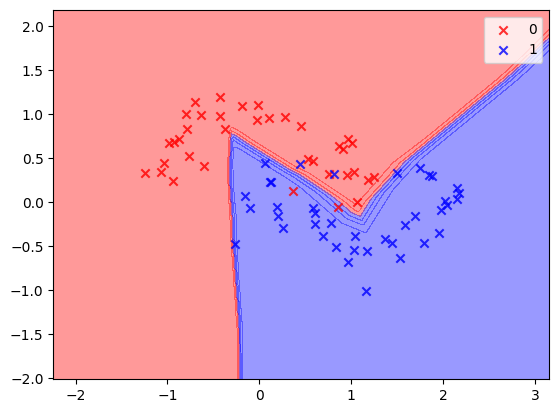

In [27]:
# YOUR CODE HERE
# Use plot_decision_regions to check the accuracy of the predictions visually

plot_decision_regions(X3_test, y3_test, model)


---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!